In [1]:
from matplotlib import image
from matplotlib import pyplot

In [2]:
import time

In [3]:
import os
import numpy as np
import cv2
import glob
import shutil
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [1]:
base_dir = '../plant-seedlings-classification/data'

In [9]:
base_dir

'../plant-seedlings-classification/data'

In [10]:
len(os.listdir(base_dir))

16

In [11]:
classes = os.listdir(base_dir)

In [12]:
#for cl in classes:
#  images = glob.glob(img_path + '/*.png')
#  print("{}: {} Images".format(cl, len(images)))
#  num_train = int(round(len(images)*0.8))
#  train, val = images[:num_train], images[num_train:]

#  for t in train:
#    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#      os.makedirs(os.path.join(base_dir, 'train', cl))
#    shutil.move(t, os.path.join(base_dir, 'train', cl))

#  for v in val:
#    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
#      os.makedirs(os.path.join(base_dir, 'val', cl))
#    shutil.move(v, os.path.join(base_dir, 'val', cl))

In [13]:
#round(len(images)*0.8)

In [2]:
train_dir = os.path.join(base_dir, 'train_b')
val_dir = os.path.join(base_dir, 'val_b')

NameError: name 'os' is not defined

In [15]:
batch_size = 100
IMG_SHAPE = 224 

In [16]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 3801 images belonging to 12 classes.


In [17]:
train_data_gen

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [19]:
#augmented_images

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

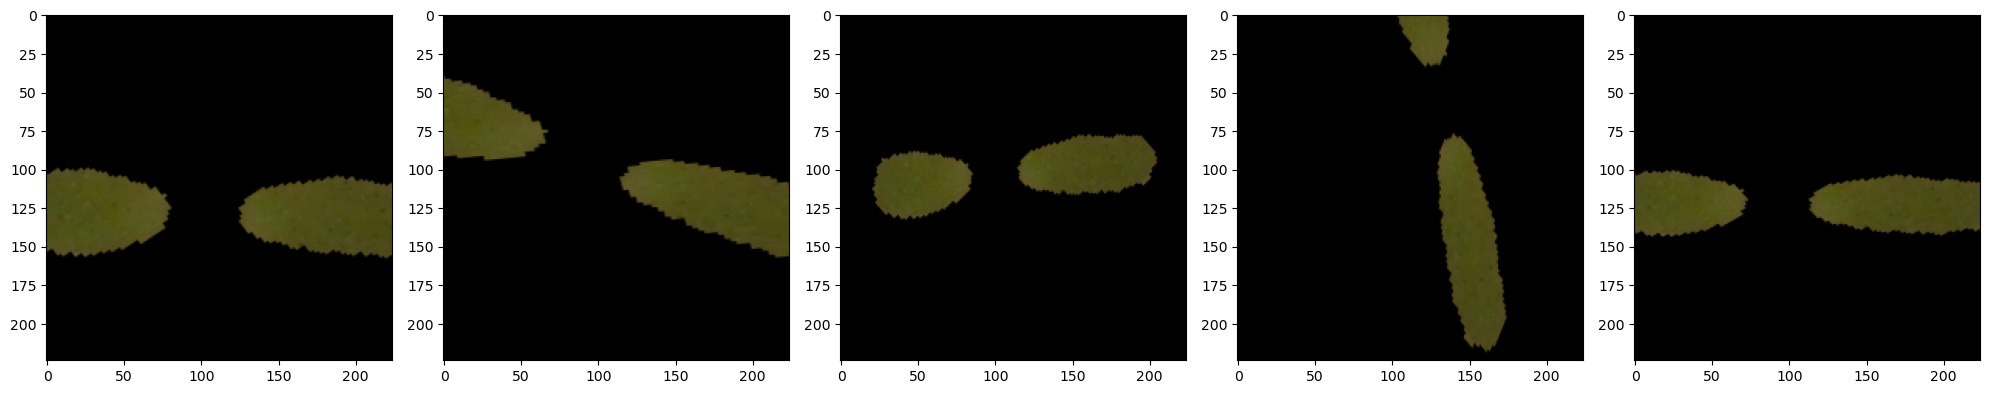

In [21]:
plotImages(augmented_images)

In [31]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 949 images belonging to 12 classes.


In [32]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(12))

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [35]:
epochs = 240

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/240
39/39 [==============================] - 127s 3s/step - loss: 2.1906 - accuracy: 0.2478 - val_loss: 1.7682 - val_accuracy: 0.4046
Epoch 2/240
39/39 [==============================] - 128s 3s/step - loss: 1.7976 - accuracy: 0.3578 - val_loss: 1.4374 - val_accuracy: 0.4984
Epoch 3/240
39/39 [==============================] - 130s 3s/step - loss: 1.6887 - accuracy: 0.4296 - val_loss: 1.5277 - val_accuracy: 0.5132
Epoch 4/240
39/39 [==============================] - 130s 3s/step - loss: 1.6298 - accuracy: 0.4401 - val_loss: 1.2393 - val_accuracy: 0.5732
Epoch 5/240
39/39 [==============================] - 131s 3s/step - loss: 1.3573 - accuracy: 0.5296 - val_loss: 1.0398 - val_accuracy: 0.6459
Epoch 6/240
39/39 [==============================] - 129s 3s/step - loss: 1.2567 - accuracy: 0.5651 - val_loss: 1.4088 - val_accuracy: 0.5290
Epoch 7/240
39/39 [==============================] - 128s 3s/step - loss: 1.3060 - accuracy: 0.5430 - val_loss: 1.0367 - val_accuracy: 0.6322
Epoch 

39/39 [==============================] - 132s 3s/step - loss: 0.2707 - accuracy: 0.8963 - val_loss: 0.2120 - val_accuracy: 0.9252
Epoch 116/240
39/39 [==============================] - 131s 3s/step - loss: 0.2645 - accuracy: 0.9013 - val_loss: 0.2330 - val_accuracy: 0.9231
Epoch 117/240
39/39 [==============================] - 138s 4s/step - loss: 0.2724 - accuracy: 0.8969 - val_loss: 0.2555 - val_accuracy: 0.9062
Epoch 118/240
39/39 [==============================] - 163s 4s/step - loss: 0.2687 - accuracy: 0.9027 - val_loss: 0.2385 - val_accuracy: 0.9168
Epoch 119/240
39/39 [==============================] - 166s 4s/step - loss: 0.2695 - accuracy: 0.9040 - val_loss: 0.3473 - val_accuracy: 0.8683
Epoch 120/240
39/39 [==============================] - 164s 4s/step - loss: 0.2881 - accuracy: 0.8966 - val_loss: 0.2526 - val_accuracy: 0.9136
Epoch 121/240
39/39 [==============================] - 165s 4s/step - loss: 0.2576 - accuracy: 0.9066 - val_loss: 0.2197 - val_accuracy: 0.9273
Epoch 

Epoch 172/240
39/39 [==============================] - 133s 3s/step - loss: 0.2017 - accuracy: 0.9261 - val_loss: 0.1914 - val_accuracy: 0.9347
Epoch 173/240
39/39 [==============================] - 134s 3s/step - loss: 0.2066 - accuracy: 0.9271 - val_loss: 1.8838 - val_accuracy: 0.6512
Epoch 174/240
39/39 [==============================] - 130s 3s/step - loss: 0.7205 - accuracy: 0.7874 - val_loss: 0.2556 - val_accuracy: 0.9146
Epoch 175/240
39/39 [==============================] - 141s 4s/step - loss: 0.2596 - accuracy: 0.9116 - val_loss: 0.2140 - val_accuracy: 0.9283
Epoch 176/240
39/39 [==============================] - 131s 3s/step - loss: 0.2303 - accuracy: 0.9171 - val_loss: 0.2375 - val_accuracy: 0.9178
Epoch 177/240
39/39 [==============================] - 129s 3s/step - loss: 0.2872 - accuracy: 0.9071 - val_loss: 0.2490 - val_accuracy: 0.9125
Epoch 178/240
39/39 [==============================] - 124s 3s/step - loss: 0.2227 - accuracy: 0.9171 - val_loss: 0.2211 - val_accuracy:

Epoch 229/240
39/39 [==============================] - 123s 3s/step - loss: 0.2307 - accuracy: 0.9145 - val_loss: 0.6182 - val_accuracy: 0.8135
Epoch 230/240
39/39 [==============================] - 123s 3s/step - loss: 0.3119 - accuracy: 0.8906 - val_loss: 0.1772 - val_accuracy: 0.9494
Epoch 231/240
39/39 [==============================] - 123s 3s/step - loss: 0.1748 - accuracy: 0.9363 - val_loss: 0.1591 - val_accuracy: 0.9515
Epoch 232/240
39/39 [==============================] - 123s 3s/step - loss: 0.2844 - accuracy: 0.9058 - val_loss: 0.2282 - val_accuracy: 0.9315
Epoch 233/240
39/39 [==============================] - 123s 3s/step - loss: 0.1886 - accuracy: 0.9361 - val_loss: 0.1912 - val_accuracy: 0.9378
Epoch 234/240
39/39 [==============================] - 123s 3s/step - loss: 0.1685 - accuracy: 0.9363 - val_loss: 0.1677 - val_accuracy: 0.9484
Epoch 235/240
39/39 [==============================] - 123s 3s/step - loss: 0.1563 - accuracy: 0.9405 - val_loss: 0.1767 - val_accuracy:

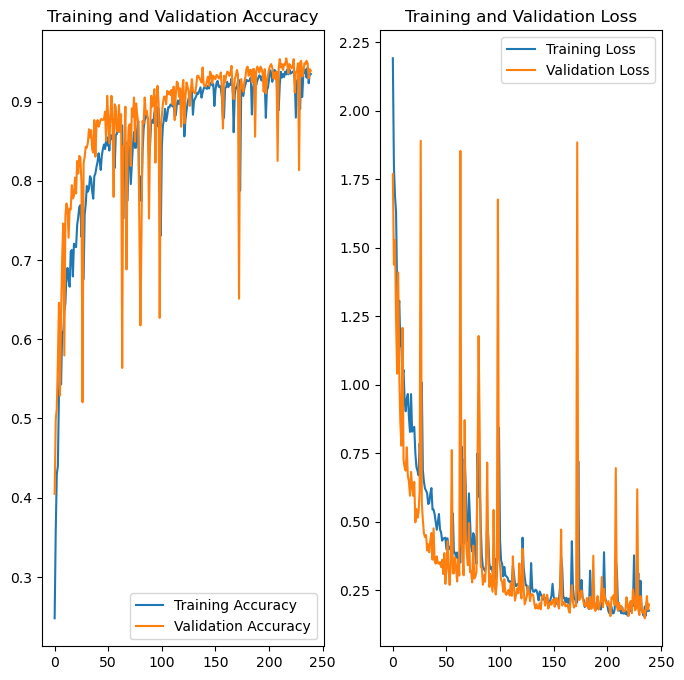

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
t = time.time()

export_path_keras = "./fil{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./fil1672275865.h5


In [158]:
ls

 磁碟區 C 中的磁碟是 Windows
 磁碟區序號:  3A4A-CD56

 C:\Users\spin\Desktop\tensorFinal\plantSeedlings\plant-seedlings-classification 的目錄

2022/12/27  上午 11:34    <DIR>          .
2022/12/27  上午 11:34    <DIR>          ..
2022/12/27  上午 10:08    <DIR>          .ipynb_checkpoints
2022/12/19  下午 01:50       127,831,776 1671429037.h5
2022/12/19  下午 08:28       127,819,488 1671452927.h5
2022/12/19  下午 08:49            90,824 1671454175.h5
2022/12/20  上午 12:09        87,919,768 1671466173.h5
2022/12/20  上午 12:09       127,819,488 1671466183.h5
2022/12/21  上午 12:38        11,702,392 1671554294.h5
2022/12/21  上午 11:07       127,819,488 1671592035.h5
2022/12/27  上午 08:18       127,819,488 1672100291.h5
2022/12/27  上午 11:34       127,819,488 1672112093.h5
2022/12/21  下午 12:24         1,918,836 CNN_svm.ipynb
2022/12/27  上午 09:22         1,750,643 CNN_with_augmentations.ipynb
2022/12/27  上午 11:34           653,536 CNN_without_augmentations.ipynb
2022/12/22  下午 03:31            16,537 cnn+SVM.ipynb
2022/12/19

In [159]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'train',
 'val']

In [94]:
test_dir = '../plant-seedlings-classification/test'

In [95]:
len(os.listdir(test_dir))

1

In [96]:
tclasses = os.listdir(test_dir)
tclasses[0]

'testdata'

In [97]:
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_train.flow_from_directory(
                                                directory=test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 794 images belonging to 1 classes.


In [98]:
len(test_data_gen)

25

In [165]:
test_data_gen[0]

(array([[[[0.38025093, 0.3606431 , 0.32135677],
          [0.38671803, 0.36078432, 0.32789448],
          [0.37586087, 0.33851033, 0.30961266],
          ...,
          [0.21286494, 0.15514162, 0.10416122],
          [0.21701097, 0.16210902, 0.11079744],
          [0.22962107, 0.1747191 , 0.12025502]],
 
         [[0.37406507, 0.35445723, 0.31207797],
          [0.38053215, 0.36078432, 0.32170862],
          [0.38699925, 0.36078432, 0.3281757 ],
          ...,
          [0.21709055, 0.16218857, 0.11085711],
          [0.22970064, 0.17479867, 0.12031469],
          [0.26965615, 0.21475418, 0.16258676]],
 
         [[0.3678792 , 0.3365968 , 0.29812938],
          [0.3743463 , 0.35473844, 0.31249982],
          [0.3808134 , 0.36078432, 0.32198983],
          ...,
          [0.2297802 , 0.17487824, 0.12037437],
          [0.26993462, 0.21503265, 0.16288513],
          [0.33392385, 0.2790219 , 0.23201227]],
 
         ...,
 
         [[0.36068168, 0.31352016, 0.25882354],
          [0.35752

In [99]:
images = [test_data_gen[0][0][0] for i in range(5)]

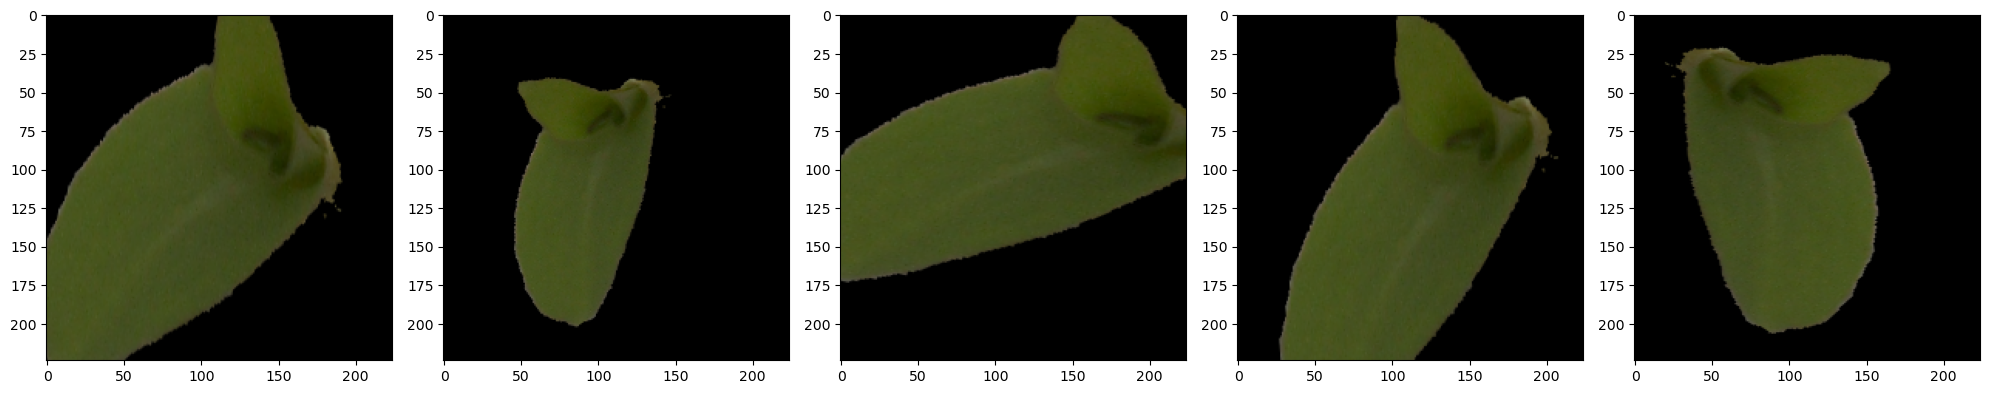

In [100]:
plotImages(images)

In [101]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [102]:
le = LabelEncoder()
le.fit(os.listdir(train_dir))

LabelEncoder()

In [103]:
os.listdir(train_dir)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [104]:
testdata_dir = test_dir + '/testdata'
testdata_dir

'../plant-seedlings-classification/test/testdata'

In [105]:
len(os.listdir(testdata_dir))

794

In [106]:
testdata = os.listdir(testdata_dir)

In [107]:
PredStr = list(le.inverse_transform(results))

In [175]:
result = {'file':testdata,'species':PredStr}
result = pd.DataFrame(result)
result.to_csv("PredictionFil.csv",index=False)

In [127]:
test_tal_num = 0
im = []
allimages= []
img_path = os.path.join(test_dir, 'testdata')
images = glob.glob(img_path + '/*.png')
allimages.extend(images)
#print("{}: {} Images".format(cl, len(images)))
test_tal_num += len(images)
#num_train = int(round(len(images)*0.8))
#train, val = images[:num_train], images[num_train:]

In [125]:
allimages

['../plant-seedlings-classification/test\\testdata\\0021e90e4.png',
 '../plant-seedlings-classification/test\\testdata\\003d61042.png',
 '../plant-seedlings-classification/test\\testdata\\007b3da8b.png',
 '../plant-seedlings-classification/test\\testdata\\0086a6340.png',
 '../plant-seedlings-classification/test\\testdata\\00c47e980.png',
 '../plant-seedlings-classification/test\\testdata\\00d090cde.png',
 '../plant-seedlings-classification/test\\testdata\\00ef713a8.png',
 '../plant-seedlings-classification/test\\testdata\\01291174f.png',
 '../plant-seedlings-classification/test\\testdata\\026716f9b.png',
 '../plant-seedlings-classification/test\\testdata\\02cfeb38d.png',
 '../plant-seedlings-classification/test\\testdata\\03566743d.png',
 '../plant-seedlings-classification/test\\testdata\\03a2ee656.png',
 '../plant-seedlings-classification/test\\testdata\\03e322a29.png',
 '../plant-seedlings-classification/test\\testdata\\03ef36742.png',
 '../plant-seedlings-classification/test\\testda

In [126]:
for i in range(len(images)):
    img = cv2.imread(allimages[i])
    img = tf.image.resize(img, [224,224])
    im.append(img)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [116]:
im = np.array(im)/255.0
im_rgb = im[:,:,::-1]

In [179]:
im[1]

array([[[0.29623055, 0.41041827, 0.5102662 ],
        [0.26771843, 0.4036673 , 0.51577425],
        [0.3213987 , 0.4568081 , 0.55080324],
        ...,
        [0.1537933 , 0.15993704, 0.18273196],
        [0.17054035, 0.19241065, 0.22116764],
        [0.22021616, 0.2510492 , 0.27815554]],

       [[0.3029982 , 0.4114961 , 0.5032703 ],
        [0.29803923, 0.4237647 , 0.5297647 ],
        [0.2906843 , 0.4360843 , 0.5404359 ],
        ...,
        [0.14939138, 0.15718354, 0.18571225],
        [0.16827087, 0.18361115, 0.22247379],
        [0.21806635, 0.2376338 , 0.27423394]],

       [[0.28275818, 0.38875815, 0.49168867],
        [0.30011046, 0.42203203, 0.528032  ],
        [0.29761764, 0.4357756 , 0.54759365],
        ...,
        [0.13888879, 0.14423625, 0.16686258],
        [0.16963628, 0.17859052, 0.21083878],
        [0.22598676, 0.24328324, 0.27392137]],

       ...,

       [[0.18369207, 0.25723696, 0.3411716 ],
        [0.18431373, 0.24913001, 0.34898627],
        [0.16581142, 0

In [118]:
predictions = model.predict(im_rgb)

25/25 [==============================] - 4s 165ms/step


In [119]:
predictions

array([[  2.703622 , -13.295111 ,  -6.6474524, ..., -13.56046  ,
         -6.699278 ,   1.2086197],
       [  2.703622 , -13.295111 ,  -6.6474524, ..., -13.56046  ,
         -6.699278 ,   1.2086197],
       [  2.703622 , -13.295111 ,  -6.6474524, ..., -13.56046  ,
         -6.699278 ,   1.2086197],
       ...,
       [  2.703622 , -13.295111 ,  -6.6474524, ..., -13.56046  ,
         -6.699278 ,   1.2086197],
       [  2.7036223, -13.29511  ,  -6.6474533, ..., -13.560458 ,
         -6.6992784,   1.2086197],
       [  2.7036223, -13.29511  ,  -6.6474533, ..., -13.560458 ,
         -6.6992784,   1.2086197]], dtype=float32)

In [120]:
results = []
for i in range(predictions.shape[0]):
    results.append(np.argmax(predictions[i]))

In [121]:
PredStr = list(le.inverse_transform(results))

In [123]:
result = {'file':testdata,'species':PredStr}
result = pd.DataFrame(result)
result.to_csv("PredictionFil.csv",index=False)
#score : 